In [1]:
import pandas as pd
import re
import numpy as np
import yaml  # To read YAML configuration files
from pathlib import Path  # For cross-platform file path handling


# Load directory paths from configuration file
with open('paths.yml', 'r') as file:
    paths = yaml.safe_load(file)  # Read and parse YAML file

# Create Path objects for each directory
raw = Path(paths['data']['raw'])  # Directory with raw data
temp = Path(paths['data']['temp'])  # Directory with temporary processed data
processed = Path(paths['data']['processed'])  # Directory with final processed data

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

In [3]:
df_demografia = pd.read_parquet(temp/ "dane" / "demografía" / "dane_demografia.parquet")
df_demografia['quarter'] = pd.to_datetime(df_demografia['quarter']).dt.to_period('Q')
df_demografia

,mun_code,quarter,population,women_share
0,05001,1995Q4,1756761.0,0.53607
1,05001,1996Q1,1772295.0,0.53631
2,05001,1996Q2,1780062.0,0.53643
3,05001,1996Q3,1783946.0,0.53649
4,05001,1996Q4,1787831.0,0.53655
...,...,...,...,...
135786,99773,2024Q4,104385.0,0.46626
135787,99773,2025Q1,106969.0,0.46653
135788,99773,2025Q2,108262.0,0.46665
135789,99773,2025Q3,108908.0,0.46672


In [4]:
df_homicides = pd.read_parquet(temp/"mindef"/"top5"/"homicides.parquet")
crime_code_homicides = df_homicides['crime_code'].max()
df_homicides.rename(columns={"qty": f"qty_{crime_code_homicides}"}, inplace=True)
df_homicides.drop(columns=['crime_code'], inplace=True)
df_homicides['quarter'] = pd.to_datetime(df_homicides['date']).dt.to_period('Q')
df_homicides = df_homicides.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_homicides}"].sum().reset_index()
df_homicides

,mun_code,quarter,qty_01
0,05001,2003Q1,576
1,05001,2003Q2,539
2,05001,2003Q3,442
3,05001,2003Q4,367
4,05001,2004Q1,280
...,...,...,...
49332,99773,2024Q3,1
49333,99773,2024Q4,1
49334,99773,2025Q1,1
49335,99773,2025Q2,1


In [5]:
df_kidnappings = pd.read_parquet(temp/"mindef"/"top5"/"kidnappings.parquet")
crime_code_kidnappings = df_kidnappings['crime_code'].max()
df_kidnappings.rename(columns={"qty": f"qty_{crime_code_kidnappings}"}, inplace=True)
df_kidnappings.drop(columns=['crime_code'], inplace=True)
df_kidnappings['quarter'] = pd.to_datetime(df_kidnappings['date']).dt.to_period('Q')
df_kidnappings = df_kidnappings.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_kidnappings}"].sum().reset_index()
df_kidnappings

,mun_code,quarter,qty_02
0,05001,2003Q1,19
1,05001,2003Q2,10
2,05001,2003Q3,6
3,05001,2003Q4,16
4,05001,2004Q1,10
...,...,...,...
5103,99773,2003Q1,3
5104,99773,2005Q2,1
5105,99773,2006Q3,1
5106,99773,2011Q1,1


In [6]:
df_terrorism = pd.read_parquet(temp/"mindef"/"top5"/"terrorism.parquet")
crime_code_terrorism = df_terrorism['crime_code'].max()
df_terrorism.rename(columns={"qty": f"qty_{crime_code_terrorism}"}, inplace=True)
df_terrorism.drop(columns=['crime_code'], inplace=True)
df_terrorism['quarter'] = pd.to_datetime(df_terrorism['date']).dt.to_period('Q')
df_terrorism = df_terrorism.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_terrorism}"].sum().reset_index()
df_terrorism

,mun_code,quarter,qty_03
0,05001,2003Q1,1
1,05001,2003Q2,3
2,05001,2003Q3,6
3,05001,2003Q4,7
4,05001,2004Q1,3
...,...,...,...
7028,99773,2015Q1,1
7029,99773,2017Q3,1
7030,99773,2019Q2,2
7031,99773,2019Q4,1


In [7]:
df_extortion = pd.read_parquet(temp/"mindef"/"top5"/"extortion.parquet")
crime_code_extortion = df_extortion['crime_code'].max()
df_extortion.rename(columns={"qty": f"qty_{crime_code_extortion}"}, inplace=True)
df_extortion.drop(columns=['crime_code'], inplace=True)
df_extortion['quarter'] = pd.to_datetime(df_extortion['date']).dt.to_period('Q')
df_extortion = df_extortion.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_extortion}"].sum().reset_index()
df_extortion

,mun_code,quarter,qty_04
0,05001,2003Q1,47
1,05001,2003Q2,27
2,05001,2003Q3,32
3,05001,2003Q4,39
4,05001,2004Q1,35
...,...,...,...
24102,99773,2024Q2,1
24103,99773,2024Q4,2
24104,99773,2025Q1,1
24105,99773,2025Q2,3


In [8]:
df_massacres = pd.read_parquet(temp / 'massacres' / 'massacres.parquet')
crime_code_massacres = df_massacres['crime_code'].max()
df_massacres.rename(columns={"qty": f"qty_{crime_code_massacres}"}, inplace=True)
df_massacres['mun_code'] = df_massacres['mun_code'].astype(float).astype(int).astype(str).str.zfill(5)
df_massacres['quarter'] = pd.to_datetime(df_massacres['date']).dt.to_period('Q')
df_massacres = df_massacres.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_massacres}"].sum().reset_index()
df_massacres

,mun_code,quarter,qty_05
0,05001,1992Q4,9.0
1,05001,1997Q2,6.0
2,05001,2001Q2,6.0
3,05001,2008Q2,4.0
4,05001,2008Q3,8.0
...,...,...,...
1160,95200,2008Q3,6.0
1161,95200,2024Q2,3.0
1162,99524,1999Q2,4.0
1163,99773,1998Q3,5.0


In [9]:
df_aspersion = pd.read_parquet(temp/"mindef"/"other"/"aspersion.parquet")
crime_code_aspersion = df_aspersion['crime_code'].max()
df_aspersion.rename(columns={"qty": f"qty_{crime_code_aspersion}"}, inplace=True)
df_aspersion.drop(columns=['crime_code'], inplace=True)
df_aspersion['quarter'] = pd.to_datetime(df_aspersion['date']).dt.to_period('Q')
df_aspersion = df_aspersion.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_aspersion}"].sum().reset_index()
df_aspersion

,mun_code,quarter,qty_06
0,05001,2005Q2,294.25
1,05031,2006Q3,569.82
2,05031,2007Q2,204.48
3,05031,2007Q4,46.61
4,05031,2008Q3,100.88
...,...,...,...
2467,99773,2011Q3,1014.09
2468,99773,2012Q1,40.61
2469,99773,2012Q3,10.46
2470,99773,2015Q1,42.36


In [10]:
df_mining_arrests = pd.read_parquet(temp/"mindef"/"other"/"illegal_mining_arrests.parquet")
crime_code_mining_arrests = df_mining_arrests['crime_code'].max()
df_mining_arrests.rename(columns={"qty": f"qty_{crime_code_mining_arrests}"}, inplace=True)
df_mining_arrests.drop(columns=['crime_code'], inplace=True)
df_mining_arrests['quarter'] = pd.to_datetime(df_mining_arrests['date']).dt.to_period('Q')
df_mining_arrests = df_mining_arrests.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_mining_arrests}"].sum().reset_index()
df_mining_arrests

,mun_code,quarter,qty_07
0,00000,2025Q2,1
1,05001,2014Q3,3
2,05001,2015Q1,1
3,05001,2016Q2,1
4,05001,2016Q3,1
...,...,...,...
4121,99773,2018Q4,3
4122,99773,2020Q3,3
4123,99773,2022Q3,6
4124,99773,2024Q3,6


In [11]:
df_environmental = pd.read_parquet(temp/"mindef"/"other"/"environmental_crimes.parquet")
crime_code_environmental = df_environmental['crime_code'].max()
df_environmental.rename(columns={"qty": f"qty_{crime_code_environmental}"}, inplace=True)
df_environmental.drop(columns=['crime_code'], inplace=True)
df_environmental['quarter'] = pd.to_datetime(df_environmental['date']).dt.to_period('Q')
df_environmental = df_environmental.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_environmental}"].sum().reset_index()
df_environmental

,mun_code,quarter,qty_08
0,05001,2003Q1,2
1,05001,2004Q1,1
2,05001,2005Q1,1
3,05001,2006Q1,1
4,05001,2006Q3,2
...,...,...,...
24883,99773,2022Q4,1
24884,99773,2024Q1,1
24885,99773,2024Q3,1
24886,99773,2025Q1,1


In [12]:
df_drug_infra = pd.read_parquet(temp/"mindef"/"other"/"drug_infrastructure_destruction.parquet")
crime_code_drug_infra = df_drug_infra['crime_code'].max()
df_drug_infra.rename(columns={"qty": f"qty_{crime_code_drug_infra}"}, inplace=True)
df_drug_infra.drop(columns=['crime_code'], inplace=True)
df_drug_infra['quarter'] = pd.to_datetime(df_drug_infra['date']).dt.to_period('Q')
df_drug_infra = df_drug_infra.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_drug_infra}"].sum().reset_index()
df_drug_infra

,mun_code,quarter,qty_09
0,00nan,2011Q3,1
1,01-51,2021Q1,2
2,01-51,2021Q3,15
3,01-58,2014Q4,11
4,01-58,2015Q1,10
...,...,...,...
7493,99773,2024Q3,34
7494,99773,2024Q4,32
7495,99773,2025Q1,23
7496,99773,2025Q2,12


In [13]:
df_eradication = pd.read_parquet(temp/"mindef"/"other"/"eradication.parquet")
crime_code_eradication = df_eradication['crime_code'].max()
df_eradication.rename(columns={"qty": f"qty_{crime_code_eradication}"}, inplace=True)
df_eradication.drop(columns=['crime_code'], inplace=True)
df_eradication['quarter'] = pd.to_datetime(df_eradication['date']).dt.to_period('Q')
df_eradication = df_eradication.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_eradication}"].sum().reset_index()
df_eradication

,mun_code,quarter,qty_10
0,05001,2009Q4,3.0000
1,05001,2016Q1,1.0000
2,05002,2013Q2,0.5000
3,05002,2014Q3,0.1000
4,05021,2018Q2,0.0800
...,...,...,...
8201,99773,2020Q3,67.5900
8202,99773,2020Q4,48.0395
8203,99773,2021Q1,13.2397
8204,99773,2021Q3,35.1204


In [14]:
df_coca = pd.read_parquet(temp/"mindef"/"other"/"coca_leaf.parquet")
crime_code_coca = df_coca['crime_code'].max()
df_coca.rename(columns={"qty": f"qty_{crime_code_coca}"}, inplace=True)
df_coca.drop(columns=['crime_code'], inplace=True)
df_coca['quarter'] = pd.to_datetime(df_coca['date']).dt.to_period('Q')
df_coca = df_coca.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_coca}"].sum().reset_index()
df_coca

,mun_code,quarter,qty_11
0,05031,2011Q1,200.000
1,05031,2013Q1,385.000
2,05031,2015Q3,300.000
3,05031,2017Q3,70.000
4,05031,2020Q1,650.000
...,...,...,...
4597,99773,2024Q2,1196.155
4598,99773,2024Q3,40.000
4599,99773,2024Q4,1777.000
4600,99773,2025Q1,62.000


In [15]:
df_commerce_theft = pd.read_parquet(temp/"mindef"/"other"/"commerce_theft.parquet")
crime_code_commerce_theft = df_commerce_theft['crime_code'].max()
df_commerce_theft.rename(columns={"qty": f"qty_{crime_code_commerce_theft}"}, inplace=True)
df_commerce_theft.drop(columns=['crime_code'], inplace=True)
df_commerce_theft['quarter'] = pd.to_datetime(df_commerce_theft['date']).dt.to_period('Q')
df_commerce_theft = df_commerce_theft.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_commerce_theft}"].sum().reset_index()
df_commerce_theft

,mun_code,quarter,qty_12
0,05001,2003Q1,134
1,05001,2003Q2,237
2,05001,2003Q3,309
3,05001,2003Q4,312
4,05001,2004Q1,197
...,...,...,...
41708,99773,2024Q3,4
41709,99773,2024Q4,2
41710,99773,2025Q1,1
41711,99773,2025Q2,1


In [16]:
df_person_theft = pd.read_parquet(temp/"mindef"/"other"/"person_theft.parquet")
crime_code_person_theft = df_person_theft['crime_code'].max()
df_person_theft.rename(columns={"qty": f"qty_{crime_code_person_theft}"}, inplace=True)
df_person_theft.drop(columns=['crime_code'], inplace=True)
df_person_theft['quarter'] = pd.to_datetime(df_person_theft['date']).dt.to_period('Q')
df_person_theft = df_person_theft.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_person_theft}"].sum().reset_index()
df_person_theft

,mun_code,quarter,qty_13
0,05001,2003Q1,313
1,05001,2003Q2,465
2,05001,2003Q3,644
3,05001,2003Q4,680
4,05001,2004Q1,682
...,...,...,...
53624,99773,2025Q3,2
53625,SIN ESTABLECER,2008Q1,16818
53626,SIN ESTABLECER,2008Q2,17031
53627,SIN ESTABLECER,2008Q3,16102


In [17]:
df_cocaine = pd.read_parquet(temp/"mindef"/"other"/"cocaine_seizure.parquet")
crime_code_cocaine = df_cocaine['crime_code'].max()
df_cocaine.rename(columns={"qty": f"qty_{crime_code_cocaine}"}, inplace=True)
df_cocaine.drop(columns=['crime_code'], inplace=True)
df_cocaine['quarter'] = pd.to_datetime(df_cocaine['date']).dt.to_period('Q')
df_cocaine = df_cocaine.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_cocaine}"].sum().reset_index()
df_cocaine

,mun_code,quarter,qty_14
0,00355,2022Q2,60.000
1,00599,2022Q2,1112.000
2,00599,2022Q3,3939.600
3,00599,2022Q4,2902.550
4,00nan,2010Q1,1648.000
...,...,...,...
26876,99773,2023Q3,57.000
26877,99773,2023Q4,1047.510
26878,99773,2024Q3,0.014
26879,99773,2025Q1,0.009


In [18]:
df_mines = pd.read_parquet(temp/"mindef"/"other"/"intervened_mines.parquet")
crime_code_mines = df_mines['crime_code'].max()
df_mines.rename(columns={"qty": f"qty_{crime_code_mines}"}, inplace=True)
df_mines.drop(columns=['crime_code'], inplace=True)
df_mines['quarter'] = pd.to_datetime(df_mines['date']).dt.to_period('Q')
df_mines = df_mines.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_mines}"].sum().reset_index()
df_mines

,mun_code,quarter,qty_15
0,05001,2024Q1,6
1,05001,2024Q3,10
2,05001,2024Q4,13
3,05001,2025Q1,4
4,05002,2017Q1,1
...,...,...,...
5774,97666,2013Q2,4
5775,99001,2024Q3,2
5776,99001,2024Q4,2
5777,99001,2025Q1,1


In [19]:
df_trafficking = pd.read_parquet(temp/"mindef"/"other"/"human_trafficking.parquet")
crime_code_trafficking = df_trafficking['crime_code'].max()
df_trafficking.rename(columns={"qty": f"qty_{crime_code_trafficking}"}, inplace=True)
df_trafficking.drop(columns=['crime_code'], inplace=True)
df_trafficking['quarter'] = pd.to_datetime(df_trafficking['date']).dt.to_period('Q')
df_trafficking = df_trafficking.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_trafficking}"].sum().reset_index()
df_trafficking

,mun_code,quarter,qty_16
0,05001,2007Q4,1
1,05001,2009Q2,71
2,05001,2012Q4,2
3,05001,2014Q4,1
4,05001,2015Q1,1
...,...,...,...
1347,99001,2022Q3,2
1348,99001,2023Q3,1
1349,99524,2021Q3,1
1350,99624,2017Q2,1


In [20]:
df_pipeline = pd.read_parquet(temp/"mindef"/"other"/"pipeline_bombing.parquet")
crime_code_pipeline = df_pipeline['crime_code'].max()
df_pipeline.rename(columns={"qty": f"qty_{crime_code_pipeline}"}, inplace=True)
df_pipeline.drop(columns=['crime_code'], inplace=True)
df_pipeline['quarter'] = pd.to_datetime(df_pipeline['date']).dt.to_period('Q')
df_pipeline = df_pipeline.groupby(['mun_code', 'quarter'])[f"qty_{crime_code_pipeline}"].sum().reset_index()
df_pipeline

,mun_code,quarter,qty_17
0,05690,2014Q3,1
1,05893,2011Q2,2
2,05893,2012Q1,1
3,05893,2012Q4,1
4,05893,2015Q3,1
...,...,...,...
538,86865,2014Q3,6
539,86865,2014Q4,6
540,86865,2015Q2,4
541,86865,2019Q3,1


``` python
Fixed Effects Departamento
Commodities
Covid casos
Covid muertes
JEP
Luces
```

In [21]:
# Celda para df_covid_c
df_covid_c = pd.read_parquet(temp/'minsalud'/'casos_covid_por_semestre.parquet')
df_covid_c.head()

# Celda para df_covid_m
df_covid_m = pd.read_parquet(temp/'minsalud'/'muertes_covid_por_semestre.parquet')
df_covid_m.head()

# Celda para df_jep
df_jep = pd.read_parquet(temp/'jep'/'jep.parquet')
df_jep.head()

# Celda para df_lights
df_lights = pd.read_parquet(temp/'clavijo-night-lights'/'lights_quarterly.parquet')
df_lights.head()

df_comm = pd.read_parquet(temp/'commodities'/'commodities.parquet')
df_comm.head()

,quarter,petroleo_crudo_mean,petroleo_crudo_median,cafe_arabica_mean,cafe_arabica_median,oro_mean,oro_median
0,2004Q1,35.250164,35.160000,73.244262,73.699997,408.634426,407.899994
1,2004Q2,38.283710,37.790001,73.577419,72.200001,393.458063,391.949997
2,2004Q3,43.892031,43.844999,70.982031,69.500000,402.154686,403.699997
3,2004Q4,48.271935,48.840000,86.406452,83.750000,434.058064,435.750000
4,2005Q1,50.030984,48.779999,114.850000,115.099998,427.866667,426.449997


In [22]:
# Convertir quarter a Period en los dataframes que lo tienen como object
df_comm['quarter'] = pd.PeriodIndex(df_comm['quarter'], freq='Q')
df_jep['quarter'] = pd.PeriodIndex(df_jep['quarter'], freq='Q')
df_lights['quarter'] = pd.PeriodIndex(df_lights['quarter'], freq='Q')

In [23]:
for i in [df_homicides,df_kidnappings, df_terrorism, df_extortion, df_massacres, df_aspersion, df_mining_arrests, df_environmental, df_drug_infra, df_eradication, df_coca, df_commerce_theft, df_person_theft, df_cocaine, df_mines, df_trafficking, df_pipeline, df_comm, df_covid_c, df_covid_m, df_jep, df_lights]:
    print(i[['quarter']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49337 entries, 0 to 49336
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   quarter  49337 non-null  period[Q-DEC]
dtypes: period[Q-DEC](1)
memory usage: 385.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108 entries, 0 to 5107
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   quarter  5108 non-null   period[Q-DEC]
dtypes: period[Q-DEC](1)
memory usage: 40.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7033 entries, 0 to 7032
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   quarter  7033 non-null   period[Q-DEC]
dtypes: period[Q-DEC](1)
memory usage: 55.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24107 entries, 0 to 24106
Data columns (total 1 columns):
 #   Column   Non-N

In [24]:
df_previo = (
    df_demografia
    .merge(df_homicides,       on=['mun_code','quarter'], how='left')
    .merge(df_kidnappings,     on=['mun_code','quarter'], how='left')
    .merge(df_terrorism,       on=['mun_code','quarter'], how='left')
    .merge(df_extortion,       on=['mun_code','quarter'], how='left')
    .merge(df_massacres,       on=['mun_code','quarter'], how='left')
    .merge(df_aspersion,       on=['mun_code','quarter'], how='left')
    .merge(df_mining_arrests,  on=['mun_code','quarter'], how='left')
    .merge(df_environmental,   on=['mun_code','quarter'], how='left')
    .merge(df_drug_infra,      on=['mun_code','quarter'], how='left')
    .merge(df_eradication,     on=['mun_code','quarter'], how='left')
    .merge(df_coca,            on=['mun_code','quarter'], how='left')
    .merge(df_commerce_theft,  on=['mun_code','quarter'], how='left')
    .merge(df_person_theft,    on=['mun_code','quarter'], how='left')
    .merge(df_cocaine,         on=['mun_code','quarter'], how='left')
    .merge(df_mines,           on=['mun_code','quarter'], how='left')
    .merge(df_trafficking,     on=['mun_code','quarter'], how='left')
    .merge(df_pipeline,        on=['mun_code','quarter'], how='left')
    .merge(df_comm,            on=['quarter'], how='left')
    .merge(df_covid_c,         on=['mun_code','quarter'], how='left')
    .merge(df_covid_m,         on=['mun_code','quarter'], how='left')
    .merge(df_jep,             on=['mun_code','quarter'], how='left')
    #.merge(df_lights,          on=['mun_code','quarter'], how='left')
    #.query("quarter >= '2003Q1' and quarter <= '2024Q4'") # me quede aqui
    .drop(columns=['qty_06'])
    .fillna(0)
    #.reset_index(drop=True)
)
df_previo['Año'] = df_previo['quarter'].dt.year
df_previo = df_previo.query("Año >= 2016")
df_previo = df_previo.reset_index(drop=True)
df_previo.head()

,mun_code,quarter,population,women_share,qty_01,qty_02,qty_03,qty_04,qty_05,qty_07,...,cafe_arabica_mean,cafe_arabica_median,oro_mean,oro_median,covid,covid_d,ia,igc,iif,Año
0,05001,2016Q1,2335933.0,0.52999,117.0,8.0,1.0,119.0,0.0,0.0,...,119.595082,118.199997,1184.765573,1219.800049,0.0,0.0,0.0,0.0,0.0,2016
1,05001,2016Q2,2343505.0,0.52999,136.0,4.0,3.0,79.0,0.0,1.0,...,127.796094,124.924999,1259.892185,1259.600037,0.0,0.0,0.0,0.0,0.0,2016
2,05001,2016Q3,2347291.0,0.52999,132.0,6.0,1.0,69.0,0.0,1.0,...,145.589844,145.075005,1333.509378,1332.850037,0.0,0.0,0.0,0.0,0.0,2016
3,05001,2016Q4,2351077.0,0.52999,145.0,6.0,4.0,69.0,0.0,0.0,...,151.413115,152.300003,1216.034436,1221.199951,0.0,0.0,0.0,0.0,0.0,2016
4,05001,2017Q1,2368047.0,0.52995,117.0,2.0,2.0,115.0,0.0,8.0,...,144.536290,143.875000,1219.658067,1224.150024,0.0,0.0,0.0,0.0,0.0,2017


``` python
Homicidio 19.0 17.04
Secuestro 16.0 14.35
Terrorismo 15.0 13.45
Extorsión 11.5 10.31
Masacres 50.0 44.84
```

In [25]:
pena_01 = 19
pena_02 = 16
pena_03 = 15
pena_04 = 11.5
pena_05 = 50
total_penas = pena_01 + pena_02 + pena_03 + pena_04 + pena_05

df_previo['qty_iacv'] = (
      df_previo['qty_01'] * (pena_01 / total_penas) 
    + df_previo['qty_02'] * (pena_02 / total_penas) 
    + df_previo['qty_03'] * (pena_03 / total_penas) 
    + df_previo['qty_04'] * (pena_04 / total_penas) 
    + df_previo['qty_05'] * (pena_05 / total_penas)
).round(2)

df_previo['iacv'] = ((df_previo['qty_iacv'] / df_previo['population']) * 100_000).round(2)
df_previo

,mun_code,quarter,population,women_share,qty_01,qty_02,qty_03,qty_04,qty_05,qty_07,...,oro_mean,oro_median,covid,covid_d,ia,igc,iif,Año,qty_iacv,iacv
0,05001,2016Q1,2335933.0,0.52999,117.0,8.0,1.0,119.0,0.0,0.0,...,1184.765573,1219.800049,0.0,0.0,0.0,0.00,0.0,2016,33.49,1.43
1,05001,2016Q2,2343505.0,0.52999,136.0,4.0,3.0,79.0,0.0,1.0,...,1259.892185,1259.600037,0.0,0.0,0.0,0.00,0.0,2016,32.30,1.38
2,05001,2016Q3,2347291.0,0.52999,132.0,6.0,1.0,69.0,0.0,1.0,...,1333.509378,1332.850037,0.0,0.0,0.0,0.00,0.0,2016,30.61,1.30
3,05001,2016Q4,2351077.0,0.52999,145.0,6.0,4.0,69.0,0.0,0.0,...,1216.034436,1221.199951,0.0,0.0,0.0,0.00,0.0,2016,33.22,1.41
4,05001,2017Q1,2368047.0,0.52995,117.0,2.0,2.0,115.0,0.0,8.0,...,1219.658067,1224.150024,0.0,0.0,0.0,0.00,0.0,2017,32.35,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44904,99773,2024Q4,104385.0,0.46626,1.0,0.0,0.0,2.0,0.0,4.0,...,2661.817192,2649.799927,0.0,0.0,0.0,0.00,0.0,2024,0.38,0.36
44905,99773,2025Q1,106969.0,0.46653,1.0,0.0,0.0,1.0,0.0,0.0,...,2867.896729,2891.000000,0.0,0.0,0.0,0.00,0.0,2025,0.27,0.25
44906,99773,2025Q2,108262.0,0.46665,1.0,0.0,0.0,3.0,0.0,0.0,...,3279.814508,3309.000000,0.0,0.0,0.2,0.25,0.0,2025,0.48,0.44
44907,99773,2025Q3,108908.0,0.46672,2.0,0.0,0.0,1.0,0.0,0.0,...,3461.807685,3374.399902,0.0,0.0,0.0,0.00,0.0,2025,0.44,0.40


In [26]:
total_penas2 = pena_01 + pena_02 + pena_03 + pena_04

df_previo['qty_iacv2'] = (
      df_previo['qty_01'] * (pena_01 / total_penas2) 
    + df_previo['qty_02'] * (pena_02 / total_penas2) 
    + df_previo['qty_03'] * (pena_03 / total_penas2) 
    + df_previo['qty_04'] * (pena_04 / total_penas2)
).round(2)

df_previo['iacv2'] = ((df_previo['qty_iacv2'] / df_previo['population']) * 100_000).round(2)
df_previo

,mun_code,quarter,population,women_share,qty_01,qty_02,qty_03,qty_04,qty_05,qty_07,...,covid,covid_d,ia,igc,iif,Año,qty_iacv,iacv,qty_iacv2,iacv2
0,05001,2016Q1,2335933.0,0.52999,117.0,8.0,1.0,119.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,2016,33.49,1.43,60.72,2.60
1,05001,2016Q2,2343505.0,0.52999,136.0,4.0,3.0,79.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.0,2016,32.30,1.38,58.56,2.50
2,05001,2016Q3,2347291.0,0.52999,132.0,6.0,1.0,69.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.0,2016,30.61,1.30,55.49,2.36
3,05001,2016Q4,2351077.0,0.52999,145.0,6.0,4.0,69.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,2016,33.22,1.41,60.24,2.56
4,05001,2017Q1,2368047.0,0.52995,117.0,2.0,2.0,115.0,0.0,8.0,...,0.0,0.0,0.0,0.00,0.0,2017,32.35,1.37,58.66,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44904,99773,2024Q4,104385.0,0.46626,1.0,0.0,0.0,2.0,0.0,4.0,...,0.0,0.0,0.0,0.00,0.0,2024,0.38,0.36,0.68,0.65
44905,99773,2025Q1,106969.0,0.46653,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,2025,0.27,0.25,0.50,0.47
44906,99773,2025Q2,108262.0,0.46665,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.2,0.25,0.0,2025,0.48,0.44,0.87,0.80
44907,99773,2025Q3,108908.0,0.46672,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,2025,0.44,0.40,0.80,0.73


In [27]:
# mun_code	quarter	population	women_share	qty_01	qty_02	qty_03	qty_04	qty_05	qty_06	qty_07	qty_08	qty_09	qty_10	qty_11	qty_12	qty_13	qty_14	qty_15	qty_16	qty_17	petroleo_crudo_mean	petroleo_crudo_median	cafe_arabica_mean	cafe_arabica_median	oro_mean	oro_median	covid	covid_d	ia	igc	iif	luces_mean	luces_median	luces_stdev	qty_iacv	iacv	qty_iacv2	iacv2	Año
# 05001	2021Q1	2498787.0	0.52827	92.0	1.0	0.0	91.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	900.0	4891.0	53.74508	0.0	7.0	0.0	58.13639356269211	59.15999984741211	127.09999934962538	126.4000015258789	1791.6803318711577	1797.199951171875	65274.0	1651.0	0.6	0.0	0.33	44.22004	53.292686	19.89418	0.0	0.0	0.0	0.0	2021
# 05001	2021Q2	2503203.0	0.5282	118.0	2.0	21.0	125.0	0.0	0.0	7.0	5.0	0.0	0.0	0.0	749.0	5095.0	8.03725	0.0	2.0	0.0	66.16952435932463	65.48999786376953	146.11349196661087	149.5500030517578	1814.5793708922372	1784.0999755859375	141105.0	3451.0	0.6	0.0	0.67	44.22004	53.292686	19.89418	0.0	0.0	65.47	2.62	2021
# 05001	2021Q3	2505411.0	0.52817	83.0	4.0	3.0	201.0	0.0	0.0	0.0	6.0	0.0	0.0	0.0	853.0	6451.0	31.8686	0.0	19.0	0.0	70.5176562666893	70.45499801635742	180.14375019073486	183.4250030517578	1788.8218688964844	1796.6500244140625	44370.0	728.0	0.6	0.0	0.67	44.22004	53.292686	19.89418	0.0	0.0	65.0	2.59	2021
# 05001	2021Q4	2507620.0	0.52813	98.0	2.0	2.0	219.0	0.0	0.0	19.0	5.0	0.0	0.0	0.0	749.0	7266.0	5.9169	0.0	6.0	0.0	77.10296905040741	78.375	219.88906264305115	222.4000015258789	1795.5781135559082	1788.2999877929688	47301.0	537.0	0.4	0.0	0.67	44.22004	53.292686	19.89418	0.0	0.0	72.24	2.88	2021
# 05002	2021Q1	20920.0	0.48485	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	2.0	0.3065	0.0	0.0	0.0	58.13639356269211	59.15999984741211	127.09999934962538	126.4000015258789	1791.6803318711577	1797.199951171875	107.0	6.0	0.0	0.0	0.0	4.602453	7.1065397	3.6008677	0.0	0.0	0.0	0.0	2021

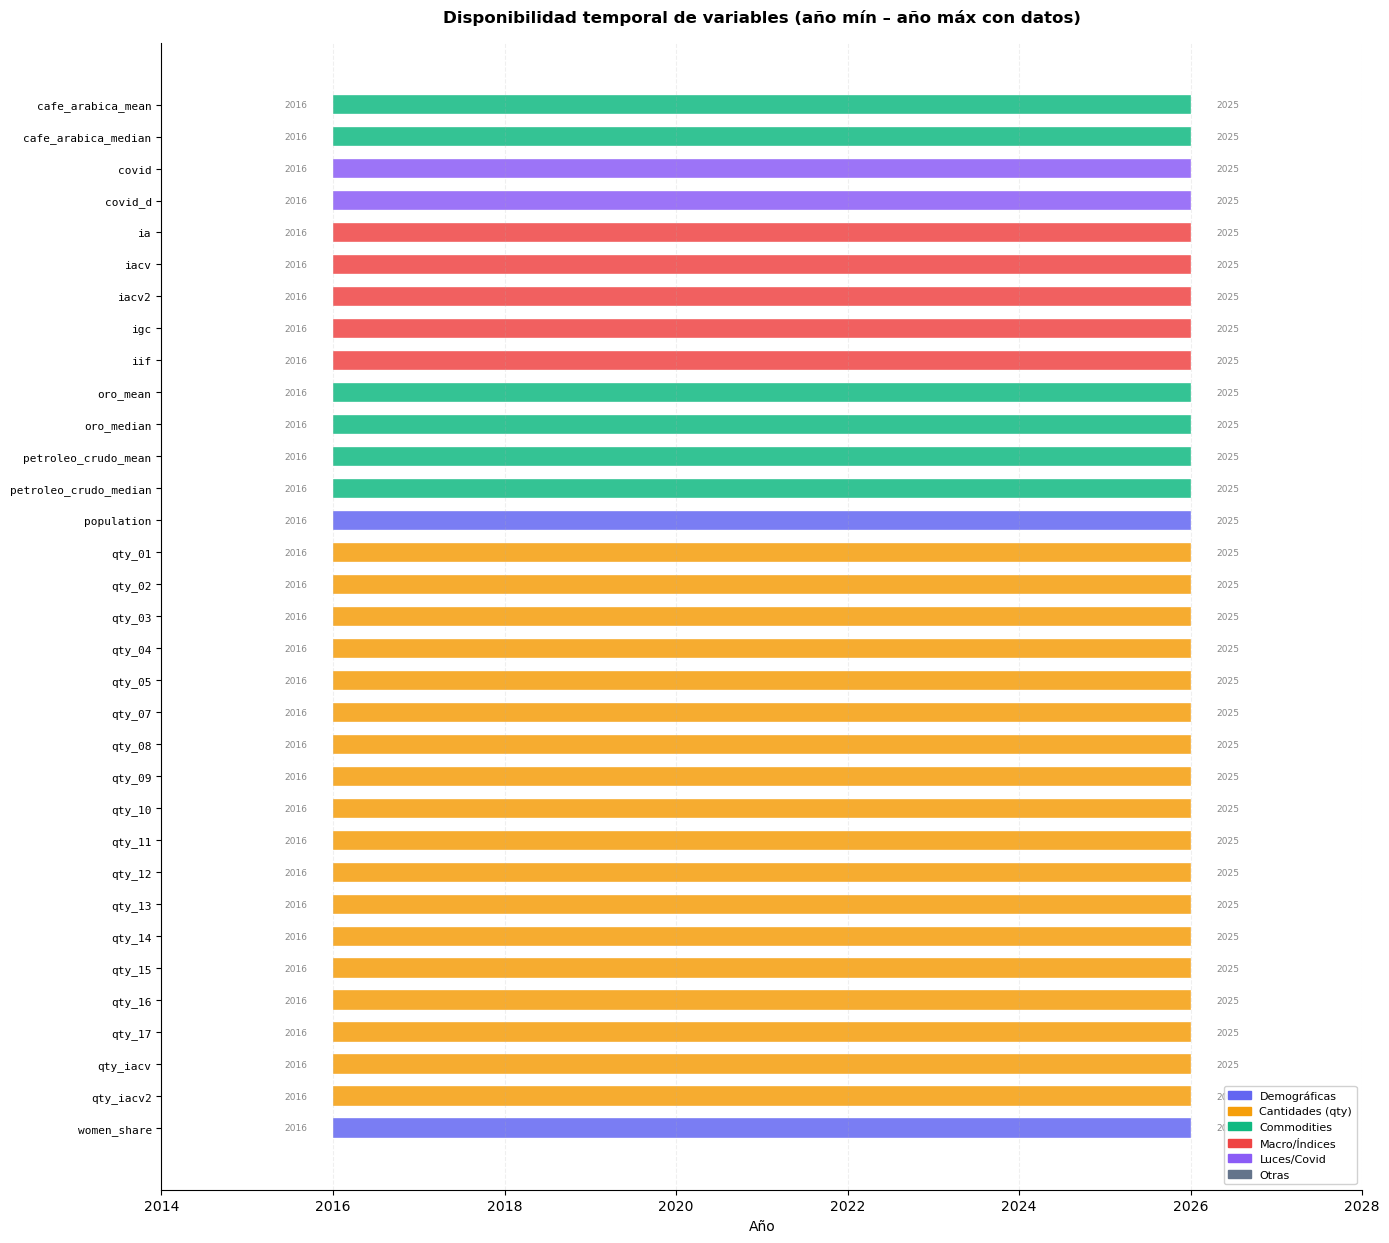

In [28]:

# Variables a excluir
exclude_cols = ['mun_code', 'quarter', 'Año']
variables = [col for col in df_previo.columns if col not in exclude_cols]

# Para cada variable, encontrar año mínimo y máximo con al menos un dato no nulo
ranges = []
for var in variables:
    non_null = df_previo.dropna(subset=[var])
    if len(non_null) > 0:
        min_year = non_null['Año'].min()
        max_year = non_null['Año'].max()
    else:
        min_year = None
        max_year = None
    ranges.append({'variable': var, 'min_year': min_year, 'max_year': max_year})

df_ranges = pd.DataFrame(ranges)

# Separar variables con y sin datos
df_with = df_ranges.dropna(subset=['min_year']).sort_values(['variable'], ascending=True).reset_index(drop=True)
df_without = df_ranges[df_ranges['min_year'].isna()]

# Categorías para colores
def get_color(var):
    if var in ['population', 'women_share']:
        return '#6366f1'
    elif var.startswith('qty_'):
        return '#f59e0b'
    elif any(x in var for x in ['petroleo', 'cafe', 'oro']):
        return '#10b981'
    elif var in ['ia', 'igc', 'iif', 'iacv', 'iacv2', 'qty_iacv', 'qty_iacv2']:
        return '#ef4444'
    elif any(x in var for x in ['luces', 'covid']):
        return '#8b5cf6'
    else:
        return '#64748b'

# Plot
fig, ax = plt.subplots(figsize=(14, max(len(df_with) * 0.38, 6)))

global_min = df_with['min_year'].min()
global_max = df_with['max_year'].max()

for i, row in df_with.iterrows():
    color = get_color(row['variable'])
    ax.barh(i, row['max_year'] - row['min_year'] + 1,
            left=row['min_year'], height=0.6, color=color, alpha=0.85,
            edgecolor='white', linewidth=0.3)
    # Etiquetas de año en las barras
    ax.text(row['min_year'] - 0.3, i, str(int(row['min_year'])),
            va='center', ha='right', fontsize=6.5, color='#888')
    ax.text(row['max_year'] + 1.3, i, str(int(row['max_year'])),
            va='center', ha='left', fontsize=6.5, color='#888')

ax.set_yticks(range(len(df_with)))
ax.set_yticklabels(df_with['variable'], fontsize=8, fontfamily='monospace')
ax.set_xlabel('Año', fontsize=10)
ax.set_title('Disponibilidad temporal de variables (año mín – año máx con datos)', fontsize=12, fontweight='bold', pad=15)

ax.set_xlim(global_min - 2, global_max + 3)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.2, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda
legend_items = [
    mpatches.Patch(color='#6366f1', label='Demográficas'),
    mpatches.Patch(color='#f59e0b', label='Cantidades (qty)'),
    mpatches.Patch(color='#10b981', label='Commodities'),
    mpatches.Patch(color='#ef4444', label='Macro/Índices'),
    mpatches.Patch(color='#8b5cf6', label='Luces/Covid'),
    mpatches.Patch(color='#64748b', label='Otras'),
]
ax.legend(handles=legend_items, loc='lower right', fontsize=8, framealpha=0.9)

plt.tight_layout()
plt.show()

# Variables sin datos
if len(df_without) > 0:
    print("\nVariables completamente nulas:")
    for v in df_without['variable'].values:
        print(f"  - {v}")


In [29]:
# Crear variables de tasa por cada 100,000 habitantes
for i in ['01', '02', '03', '04', '05', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17']:
    df_previo[f't_{i}'] = ((df_previo[f'qty_{i}'] / df_previo['population']) * 100_000).round(2)

# Eliminar todas las columnas que empiezan con 'qty'
cols_to_drop = [col for col in df_previo.columns if col.startswith('qty')]
df_previo = df_previo.drop(columns=cols_to_drop)

df_previo.head()

,mun_code,quarter,population,women_share,petroleo_crudo_mean,petroleo_crudo_median,cafe_arabica_mean,cafe_arabica_median,oro_mean,oro_median,...,t_08,t_09,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17
0,05001,2016Q1,2335933.0,0.52999,33.626393,33.070000,119.595082,118.199997,1184.765573,1219.800049,...,0.64,0.0,0.04,0.0,18.24,105.74,7.78,0.0,0.04,0.0
1,05001,2016Q2,2343505.0,0.52999,45.642500,46.515001,127.796094,124.924999,1259.892185,1259.600037,...,0.68,0.0,0.00,0.0,19.50,137.66,0.54,0.0,0.21,0.0
2,05001,2016Q3,2347291.0,0.52999,44.939219,44.920000,145.589844,145.075005,1333.509378,1332.850037,...,0.38,0.0,0.00,0.0,21.47,150.98,0.65,0.0,0.09,0.0
3,05001,2016Q4,2351077.0,0.52999,49.352623,49.959999,151.413115,152.300003,1216.034436,1221.199951,...,0.26,0.0,0.00,0.0,19.06,178.00,0.15,0.0,0.47,0.0
4,05001,2017Q1,2368047.0,0.52995,51.781452,52.690001,144.536290,143.875000,1219.658067,1224.150024,...,0.59,0.0,0.00,0.0,42.74,158.74,0.72,0.0,0.17,0.0


In [30]:
df_previo.columns

Index(['mun_code', 'quarter', 'population', 'women_share',
       'petroleo_crudo_mean', 'petroleo_crudo_median', 'cafe_arabica_mean',
       'cafe_arabica_median', 'oro_mean', 'oro_median', 'covid', 'covid_d',
       'ia', 'igc', 'iif', 'Año', 'iacv', 'iacv2', 't_01', 't_02', 't_03',
       't_04', 't_05', 't_07', 't_08', 't_09', 't_10', 't_11', 't_12', 't_13',
       't_14', 't_15', 't_16', 't_17'],
      dtype='object')

In [31]:
# Crear rezagos de iacv por municipio
df_previo = df_previo.sort_values(['mun_code', 'quarter'])

for lag in range(1, 5):
    df_previo[f'iacv_r{lag}'] = df_previo.groupby('mun_code')['iacv'].shift(lag)

df_previo

,mun_code,quarter,population,women_share,petroleo_crudo_mean,petroleo_crudo_median,cafe_arabica_mean,cafe_arabica_median,oro_mean,oro_median,...,t_12,t_13,t_14,t_15,t_16,t_17,iacv_r1,iacv_r2,iacv_r3,iacv_r4
0,05001,2016Q1,2335933.0,0.52999,33.626393,33.070000,119.595082,118.199997,1184.765573,1219.800049,...,18.24,105.74,7.78,0.0,0.04,0.0,NaN,NaN,NaN,NaN
1,05001,2016Q2,2343505.0,0.52999,45.642500,46.515001,127.796094,124.924999,1259.892185,1259.600037,...,19.50,137.66,0.54,0.0,0.21,0.0,1.43,NaN,NaN,NaN
2,05001,2016Q3,2347291.0,0.52999,44.939219,44.920000,145.589844,145.075005,1333.509378,1332.850037,...,21.47,150.98,0.65,0.0,0.09,0.0,1.38,1.43,NaN,NaN
3,05001,2016Q4,2351077.0,0.52999,49.352623,49.959999,151.413115,152.300003,1216.034436,1221.199951,...,19.06,178.00,0.15,0.0,0.47,0.0,1.30,1.38,1.43,NaN
4,05001,2017Q1,2368047.0,0.52995,51.781452,52.690001,144.536290,143.875000,1219.658067,1224.150024,...,42.74,158.74,0.72,0.0,0.17,0.0,1.41,1.30,1.38,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44904,99773,2024Q4,104385.0,0.46626,70.319531,70.090000,283.727344,275.300003,2661.817192,2649.799927,...,1.92,3.83,0.00,0.0,0.00,0.0,0.16,0.10,0.50,0.34
44905,99773,2025Q1,106969.0,0.46653,71.422295,71.290001,376.004919,383.350006,2867.896729,2891.000000,...,0.93,0.00,0.01,0.0,0.00,0.0,0.36,0.16,0.10,0.50
44906,99773,2025Q2,108262.0,0.46665,63.683387,62.540001,364.290322,361.625000,3279.814508,3309.000000,...,0.92,0.92,0.00,0.0,0.00,0.0,0.25,0.36,0.16,0.10
44907,99773,2025Q3,108908.0,0.46672,64.991692,64.519997,340.528462,326.500000,3461.807685,3374.399902,...,0.92,1.84,0.02,0.0,0.00,0.0,0.44,0.25,0.36,0.16


In [32]:
for col in ['ia', 'igc', 'iif','iacv', 'iacv2', 't_01', 't_02', 't_03','t_04', 't_05', 't_07', 't_08', 't_09', 't_10', 't_11', 't_12', 't_13','t_14', 't_15', 't_16', 't_17']:
    for lag in range(1, 5):
        df_previo[f'{col}_r{lag}'] = df_previo.groupby('mun_code')[col].shift(lag)

In [33]:
df_final = df_previo.dropna().reset_index(drop=True)

for col in ['iacv', 'iacv2', 't_01', 't_02', 't_03','t_04', 't_05']:
    df_final[f'{col}_t'] = ( #df_final['iacv_threshold']
        (
                df_final[[f'{col}_r1',f'{col}_r2', f'{col}_r3', f'{col}_r4']].mean(axis=1) 
            +   df_final[[f'{col}_r1',f'{col}_r2', f'{col}_r3', f'{col}_r4']].std(axis=1)
        )
    .round(3)
    )


    df_final[f'atypical_violence_{col}'] = np.where(
        df_final[col] > df_final[f'{col}_t'],
        1, 0
    )

``` python 
Y_iacv = 'atypical_violence_iacv'

X_iacv = [
    'population',
    'dept_code',
    'women_share',
    'petroleo_crudo_median',
    'cafe_arabica_median',
    'oro_median',
    'covid',
    'covid_d',
    'ia_r1',
    'ia_r2',
    'ia_r3',
    'ia_r4',
    'igc_r1',
    'igc_r2',
    'igc_r3',
    'igc_r4',
    'iif_r1',
    'iif_r2',
    'iif_r3',
    'iif_r4',
    'iacv_r1',
    'iacv_r2',
    'iacv_r3',
    'iacv_r4',
    't_01_r1',
    't_01_r2',
    't_01_r3',
    't_01_r4',
    't_02_r1',
    't_02_r2',
    't_02_r3',
    't_02_r4',
    't_03_r1',
    't_03_r2',
    't_03_r3',
    't_03_r4',
    't_04_r1',
    't_04_r2',
    't_04_r3',
    't_04_r4',
    't_05_r1',
    't_05_r2',
    't_05_r3',
    't_05_r4',
    't_07_r1',
    't_07_r2',
    't_07_r3',
    't_07_r4',
    't_08_r1',
    't_08_r2',
    't_08_r3',
    't_08_r4',
    't_09_r1',
    't_09_r2',
    't_09_r3',
    't_09_r4',
    't_10_r1',
    't_10_r2',
    't_10_r3',
    't_10_r4',
    't_11_r1',
    't_11_r2',
    't_11_r3',
    't_11_r4',
    't_12_r1',
    't_12_r2',
    't_12_r3',
    't_12_r4',
    't_13_r1',
    't_13_r2',
    't_13_r3',
    't_13_r4',
    't_14_r1',
    't_14_r2',
    't_14_r3',
    't_14_r4',
    't_15_r1',
    't_15_r2',
    't_15_r3',
    't_15_r4',
    't_16_r1',
    't_16_r2',
    't_16_r3',
    't_16_r4',
    't_17_r1',
    't_17_r2',
    't_17_r3',
    't_17_r4',
    'coca',
    'amapola', 
    'y_corr', 
    'y_corr_tribut_IyC', 
    'DF_ing_func', 
    'DF_deuda',
    'DF_desemp_fisc', 
    's11_total', 
    'docen_total', 
    'alumn_total', 
    'nbi_2005',
    'nbi_2018', 
    'IPM_2005', 
    'IPM_2018',
    'ipm_ledu_p_2005',
    'ipm_ledu_p_2018', 
    'ipm_analf_p_2005', 
    'ipm_analf_p_2018',
    'ipm_asisescu_p_2005', 
    'ipm_asisescu_p_2018', 
    'ipm_rezagoescu_p_2005',
    'ipm_rezagoescu_p_2018', 
    'ipm_serv_pinf_p_2005', 
    'ipm_serv_pinf_p_2018',
    'ipm_ti_p_2005', 
    'ipm_ti_p_2018', 
    'ipm_templeof_p_2005',
    'ipm_templeof_p_2018', 
    'ipm_assalud_p_2005', 
    'ipm_assalud_p_2018',
    'ipm_accsalud_p_2005', 
    'ipm_accsalud_p_2018', 
    'ipm_accagua_p_2005',
    'ipm_accagua_p_2018', 
    'ipm_excretas_p_2005', 
    'ipm_excretas_p_2018',
    'ipm_pisos_p_2005', 
    'ipm_pisos_p_2018', 
    'ipm_paredes_p_2005',
    'ipm_paredes_p_2018', 
    'ipm_hacinam_p_2005', 
    'ipm_hacinam_p_2018',
    'indrural', 
    'areaoficialkm2', 
    'altura', 
    'discapital', 
    'dismdo',
    'disbogota', 
    'distancia_mercado'
]
```

``` python 
Y_iacv2 = 'atypical_violence_iacv2'

X_iacv2 = [
    'population',
    'dept_code',
    'women_share',
    'petroleo_crudo_median',
    'cafe_arabica_median',
    'oro_median',
    'covid',
    'covid_d',
    'ia_r1',
    'ia_r2',
    'ia_r3',
    'ia_r4',
    'igc_r1',
    'igc_r2',
    'igc_r3',
    'igc_r4',
    'iif_r1',
    'iif_r2',
    'iif_r3',
    'iif_r4',
    'iacv2_r1',
    'iacv2_r2',
    'iacv2_r3',
    'iacv2_r4',
    't_01_r1',
    't_01_r2',
    't_01_r3',
    't_01_r4',
    't_02_r1',
    't_02_r2',
    't_02_r3',
    't_02_r4',
    't_03_r1',
    't_03_r2',
    't_03_r3',
    't_03_r4',
    't_04_r1',
    't_04_r2',
    't_04_r3',
    't_04_r4',
    't_05_r1',
    't_05_r2',
    't_05_r3',
    't_05_r4',
    't_07_r1',
    't_07_r2',
    't_07_r3',
    't_07_r4',
    't_08_r1',
    't_08_r2',
    't_08_r3',
    't_08_r4',
    't_09_r1',
    't_09_r2',
    't_09_r3',
    't_09_r4',
    't_10_r1',
    't_10_r2',
    't_10_r3',
    't_10_r4',
    't_11_r1',
    't_11_r2',
    't_11_r3',
    't_11_r4',
    't_12_r1',
    't_12_r2',
    't_12_r3',
    't_12_r4',
    't_13_r1',
    't_13_r2',
    't_13_r3',
    't_13_r4',
    't_14_r1',
    't_14_r2',
    't_14_r3',
    't_14_r4',
    't_15_r1',
    't_15_r2',
    't_15_r3',
    't_15_r4',
    't_16_r1',
    't_16_r2',
    't_16_r3',
    't_16_r4',
    't_17_r1',
    't_17_r2',
    't_17_r3',
    't_17_r4',
    'coca',
    'amapola', 
    'y_corr', 
    'y_corr_tribut_IyC', 
    'DF_ing_func', 
    'DF_deuda',
    'DF_desemp_fisc', 
    's11_total', 
    'docen_total', 
    'alumn_total', 
    'nbi_2005',
    'nbi_2018', 
    'IPM_2005', 
    'IPM_2018',
    'ipm_ledu_p_2005',
    'ipm_ledu_p_2018', 
    'ipm_analf_p_2005', 
    'ipm_analf_p_2018',
    'ipm_asisescu_p_2005', 
    'ipm_asisescu_p_2018', 
    'ipm_rezagoescu_p_2005',
    'ipm_rezagoescu_p_2018', 
    'ipm_serv_pinf_p_2005', 
    'ipm_serv_pinf_p_2018',
    'ipm_ti_p_2005', 
    'ipm_ti_p_2018', 
    'ipm_templeof_p_2005',
    'ipm_templeof_p_2018', 
    'ipm_assalud_p_2005', 
    'ipm_assalud_p_2018',
    'ipm_accsalud_p_2005', 
    'ipm_accsalud_p_2018', 
    'ipm_accagua_p_2005',
    'ipm_accagua_p_2018', 
    'ipm_excretas_p_2005', 
    'ipm_excretas_p_2018',
    'ipm_pisos_p_2005', 
    'ipm_pisos_p_2018', 
    'ipm_paredes_p_2005',
    'ipm_paredes_p_2018', 
    'ipm_hacinam_p_2005', 
    'ipm_hacinam_p_2018',
    'indrural', 
    'areaoficialkm2', 
    'altura', 
    'discapital', 
    'dismdo',
    'disbogota', 
    'distancia_mercado'
]
```

``` python 
Y_01 = 'atypical_violence_t_01'

X_01 = [
    'population',
    'dept_code',
    'women_share',
    'petroleo_crudo_median',
    'cafe_arabica_median',
    'oro_median',
    'covid',
    'covid_d',
    'ia_r1',
    'ia_r2',
    'ia_r3',
    'ia_r4',
    'igc_r1',
    'igc_r2',
    'igc_r3',
    'igc_r4',
    'iif_r1',
    'iif_r2',
    'iif_r3',
    'iif_r4',
    't_01_r1',
    't_01_r2',
    't_01_r3',
    't_01_r4',
    't_02_r1',
    't_02_r2',
    't_02_r3',
    't_02_r4',
    't_03_r1',
    't_03_r2',
    't_03_r3',
    't_03_r4',
    't_04_r1',
    't_04_r2',
    't_04_r3',
    't_04_r4',
    't_05_r1',
    't_05_r2',
    't_05_r3',
    't_05_r4',
    't_07_r1',
    't_07_r2',
    't_07_r3',
    't_07_r4',
    't_08_r1',
    't_08_r2',
    't_08_r3',
    't_08_r4',
    't_09_r1',
    't_09_r2',
    't_09_r3',
    't_09_r4',
    't_10_r1',
    't_10_r2',
    't_10_r3',
    't_10_r4',
    't_11_r1',
    't_11_r2',
    't_11_r3',
    't_11_r4',
    't_12_r1',
    't_12_r2',
    't_12_r3',
    't_12_r4',
    't_13_r1',
    't_13_r2',
    't_13_r3',
    't_13_r4',
    't_14_r1',
    't_14_r2',
    't_14_r3',
    't_14_r4',
    't_15_r1',
    't_15_r2',
    't_15_r3',
    't_15_r4',
    't_16_r1',
    't_16_r2',
    't_16_r3',
    't_16_r4',
    't_17_r1',
    't_17_r2',
    't_17_r3',
    't_17_r4',
    'coca',
    'amapola', 
    'y_corr', 
    'y_corr_tribut_IyC', 
    'DF_ing_func', 
    'DF_deuda',
    'DF_desemp_fisc', 
    's11_total', 
    'docen_total', 
    'alumn_total', 
    'nbi_2005',
    'nbi_2018', 
    'IPM_2005', 
    'IPM_2018',
    'ipm_ledu_p_2005',
    'ipm_ledu_p_2018', 
    'ipm_analf_p_2005', 
    'ipm_analf_p_2018',
    'ipm_asisescu_p_2005', 
    'ipm_asisescu_p_2018', 
    'ipm_rezagoescu_p_2005',
    'ipm_rezagoescu_p_2018', 
    'ipm_serv_pinf_p_2005', 
    'ipm_serv_pinf_p_2018',
    'ipm_ti_p_2005', 
    'ipm_ti_p_2018', 
    'ipm_templeof_p_2005',
    'ipm_templeof_p_2018', 
    'ipm_assalud_p_2005', 
    'ipm_assalud_p_2018',
    'ipm_accsalud_p_2005', 
    'ipm_accsalud_p_2018', 
    'ipm_accagua_p_2005',
    'ipm_accagua_p_2018', 
    'ipm_excretas_p_2005', 
    'ipm_excretas_p_2018',
    'ipm_pisos_p_2005', 
    'ipm_pisos_p_2018', 
    'ipm_paredes_p_2005',
    'ipm_paredes_p_2018', 
    'ipm_hacinam_p_2005', 
    'ipm_hacinam_p_2018',
    'indrural', 
    'areaoficialkm2', 
    'altura', 
    'discapital', 
    'dismdo',
    'disbogota', 
    'distancia_mercado'
]
```

``` python 
Y_02 = 'atypical_violence_t_02'

X_02 = [
    'population',
    'dept_code',
    'women_share',
    'petroleo_crudo_median',
    'cafe_arabica_median',
    'oro_median',
    'covid',
    'covid_d',
    'ia_r1',
    'ia_r2',
    'ia_r3',
    'ia_r4',
    'igc_r1',
    'igc_r2',
    'igc_r3',
    'igc_r4',
    'iif_r1',
    'iif_r2',
    'iif_r3',
    'iif_r4',
    't_01_r1',
    't_01_r2',
    't_01_r3',
    't_01_r4',
    't_02_r1',
    't_02_r2',
    't_02_r3',
    't_02_r4',
    't_03_r1',
    't_03_r2',
    't_03_r3',
    't_03_r4',
    't_04_r1',
    't_04_r2',
    't_04_r3',
    't_04_r4',
    't_05_r1',
    't_05_r2',
    't_05_r3',
    't_05_r4',
    't_07_r1',
    't_07_r2',
    't_07_r3',
    't_07_r4',
    't_08_r1',
    't_08_r2',
    't_08_r3',
    't_08_r4',
    't_09_r1',
    't_09_r2',
    't_09_r3',
    't_09_r4',
    't_10_r1',
    't_10_r2',
    't_10_r3',
    't_10_r4',
    't_11_r1',
    't_11_r2',
    't_11_r3',
    't_11_r4',
    't_12_r1',
    't_12_r2',
    't_12_r3',
    't_12_r4',
    't_13_r1',
    't_13_r2',
    't_13_r3',
    't_13_r4',
    't_14_r1',
    't_14_r2',
    't_14_r3',
    't_14_r4',
    't_15_r1',
    't_15_r2',
    't_15_r3',
    't_15_r4',
    't_16_r1',
    't_16_r2',
    't_16_r3',
    't_16_r4',
    't_17_r1',
    't_17_r2',
    't_17_r3',
    't_17_r4',
    'coca',
    'amapola', 
    'y_corr', 
    'y_corr_tribut_IyC', 
    'DF_ing_func', 
    'DF_deuda',
    'DF_desemp_fisc', 
    's11_total', 
    'docen_total', 
    'alumn_total', 
    'nbi_2005',
    'nbi_2018', 
    'IPM_2005', 
    'IPM_2018',
    'ipm_ledu_p_2005',
    'ipm_ledu_p_2018', 
    'ipm_analf_p_2005', 
    'ipm_analf_p_2018',
    'ipm_asisescu_p_2005', 
    'ipm_asisescu_p_2018', 
    'ipm_rezagoescu_p_2005',
    'ipm_rezagoescu_p_2018', 
    'ipm_serv_pinf_p_2005', 
    'ipm_serv_pinf_p_2018',
    'ipm_ti_p_2005', 
    'ipm_ti_p_2018', 
    'ipm_templeof_p_2005',
    'ipm_templeof_p_2018', 
    'ipm_assalud_p_2005', 
    'ipm_assalud_p_2018',
    'ipm_accsalud_p_2005', 
    'ipm_accsalud_p_2018', 
    'ipm_accagua_p_2005',
    'ipm_accagua_p_2018', 
    'ipm_excretas_p_2005', 
    'ipm_excretas_p_2018',
    'ipm_pisos_p_2005', 
    'ipm_pisos_p_2018', 
    'ipm_paredes_p_2005',
    'ipm_paredes_p_2018', 
    'ipm_hacinam_p_2005', 
    'ipm_hacinam_p_2018',
    'indrural', 
    'areaoficialkm2', 
    'altura', 
    'discapital', 
    'dismdo',
    'disbogota', 
    'distancia_mercado'
]
```

``` python 
Y_03 = 'atypical_violence_t_03'

X_03 = [
    'population',
    'dept_code',
    'women_share',
    'petroleo_crudo_median',
    'cafe_arabica_median',
    'oro_median',
    'covid',
    'covid_d',
    'ia_r1',
    'ia_r2',
    'ia_r3',
    'ia_r4',
    'igc_r1',
    'igc_r2',
    'igc_r3',
    'igc_r4',
    'iif_r1',
    'iif_r2',
    'iif_r3',
    'iif_r4',
    't_01_r1',
    't_01_r2',
    't_01_r3',
    't_01_r4',
    't_02_r1',
    't_02_r2',
    't_02_r3',
    't_02_r4',
    't_03_r1',
    't_03_r2',
    't_03_r3',
    't_03_r4',
    't_04_r1',
    't_04_r2',
    't_04_r3',
    't_04_r4',
    't_05_r1',
    't_05_r2',
    't_05_r3',
    't_05_r4',
    't_07_r1',
    't_07_r2',
    't_07_r3',
    't_07_r4',
    't_08_r1',
    't_08_r2',
    't_08_r3',
    't_08_r4',
    't_09_r1',
    't_09_r2',
    't_09_r3',
    't_09_r4',
    't_10_r1',
    't_10_r2',
    't_10_r3',
    't_10_r4',
    't_11_r1',
    't_11_r2',
    't_11_r3',
    't_11_r4',
    't_12_r1',
    't_12_r2',
    't_12_r3',
    't_12_r4',
    't_13_r1',
    't_13_r2',
    't_13_r3',
    't_13_r4',
    't_14_r1',
    't_14_r2',
    't_14_r3',
    't_14_r4',
    't_15_r1',
    't_15_r2',
    't_15_r3',
    't_15_r4',
    't_16_r1',
    't_16_r2',
    't_16_r3',
    't_16_r4',
    't_17_r1',
    't_17_r2',
    't_17_r3',
    't_17_r4',
    'coca',
    'amapola', 
    'y_corr', 
    'y_corr_tribut_IyC', 
    'DF_ing_func', 
    'DF_deuda',
    'DF_desemp_fisc', 
    's11_total', 
    'docen_total', 
    'alumn_total', 
    'nbi_2005',
    'nbi_2018', 
    'IPM_2005', 
    'IPM_2018',
    'ipm_ledu_p_2005',
    'ipm_ledu_p_2018', 
    'ipm_analf_p_2005', 
    'ipm_analf_p_2018',
    'ipm_asisescu_p_2005', 
    'ipm_asisescu_p_2018', 
    'ipm_rezagoescu_p_2005',
    'ipm_rezagoescu_p_2018', 
    'ipm_serv_pinf_p_2005', 
    'ipm_serv_pinf_p_2018',
    'ipm_ti_p_2005', 
    'ipm_ti_p_2018', 
    'ipm_templeof_p_2005',
    'ipm_templeof_p_2018', 
    'ipm_assalud_p_2005', 
    'ipm_assalud_p_2018',
    'ipm_accsalud_p_2005', 
    'ipm_accsalud_p_2018', 
    'ipm_accagua_p_2005',
    'ipm_accagua_p_2018', 
    'ipm_excretas_p_2005', 
    'ipm_excretas_p_2018',
    'ipm_pisos_p_2005', 
    'ipm_pisos_p_2018', 
    'ipm_paredes_p_2005',
    'ipm_paredes_p_2018', 
    'ipm_hacinam_p_2005', 
    'ipm_hacinam_p_2018',
    'indrural', 
    'areaoficialkm2', 
    'altura', 
    'discapital', 
    'dismdo',
    'disbogota', 
    'distancia_mercado'
]
```

``` python 
Y_04 = 'atypical_violence_t_04'

X_04 = [
    'population',
    'dept_code',
    'women_share',
    'petroleo_crudo_median',
    'cafe_arabica_median',
    'oro_median',
    'covid',
    'covid_d',
    'ia_r1',
    'ia_r2',
    'ia_r3',
    'ia_r4',
    'igc_r1',
    'igc_r2',
    'igc_r3',
    'igc_r4',
    'iif_r1',
    'iif_r2',
    'iif_r3',
    'iif_r4',
    't_01_r1',
    't_01_r2',
    't_01_r3',
    't_01_r4',
    't_02_r1',
    't_02_r2',
    't_02_r3',
    't_02_r4',
    't_03_r1',
    't_03_r2',
    't_03_r3',
    't_03_r4',
    't_04_r1',
    't_04_r2',
    't_04_r3',
    't_04_r4',
    't_05_r1',
    't_05_r2',
    't_05_r3',
    't_05_r4',
    't_07_r1',
    't_07_r2',
    't_07_r3',
    't_07_r4',
    't_08_r1',
    't_08_r2',
    't_08_r3',
    't_08_r4',
    't_09_r1',
    't_09_r2',
    't_09_r3',
    't_09_r4',
    't_10_r1',
    't_10_r2',
    't_10_r3',
    't_10_r4',
    't_11_r1',
    't_11_r2',
    't_11_r3',
    't_11_r4',
    't_12_r1',
    't_12_r2',
    't_12_r3',
    't_12_r4',
    't_13_r1',
    't_13_r2',
    't_13_r3',
    't_13_r4',
    't_14_r1',
    't_14_r2',
    't_14_r3',
    't_14_r4',
    't_15_r1',
    't_15_r2',
    't_15_r3',
    't_15_r4',
    't_16_r1',
    't_16_r2',
    't_16_r3',
    't_16_r4',
    't_17_r1',
    't_17_r2',
    't_17_r3',
    't_17_r4',
    'coca',
    'amapola', 
    'y_corr', 
    'y_corr_tribut_IyC', 
    'DF_ing_func', 
    'DF_deuda',
    'DF_desemp_fisc', 
    's11_total', 
    'docen_total', 
    'alumn_total', 
    'nbi_2005',
    'nbi_2018', 
    'IPM_2005', 
    'IPM_2018',
    'ipm_ledu_p_2005',
    'ipm_ledu_p_2018', 
    'ipm_analf_p_2005', 
    'ipm_analf_p_2018',
    'ipm_asisescu_p_2005', 
    'ipm_asisescu_p_2018', 
    'ipm_rezagoescu_p_2005',
    'ipm_rezagoescu_p_2018', 
    'ipm_serv_pinf_p_2005', 
    'ipm_serv_pinf_p_2018',
    'ipm_ti_p_2005', 
    'ipm_ti_p_2018', 
    'ipm_templeof_p_2005',
    'ipm_templeof_p_2018', 
    'ipm_assalud_p_2005', 
    'ipm_assalud_p_2018',
    'ipm_accsalud_p_2005', 
    'ipm_accsalud_p_2018', 
    'ipm_accagua_p_2005',
    'ipm_accagua_p_2018', 
    'ipm_excretas_p_2005', 
    'ipm_excretas_p_2018',
    'ipm_pisos_p_2005', 
    'ipm_pisos_p_2018', 
    'ipm_paredes_p_2005',
    'ipm_paredes_p_2018', 
    'ipm_hacinam_p_2005', 
    'ipm_hacinam_p_2018',
    'indrural', 
    'areaoficialkm2', 
    'altura', 
    'discapital', 
    'dismdo',
    'disbogota', 
    'distancia_mercado'
]
```

``` python 
Y_05 = 'atypical_violence_t_05'

X_05 = [
    'population',
    'dept_code',
    'women_share',
    'petroleo_crudo_median',
    'cafe_arabica_median',
    'oro_median',
    'covid',
    'covid_d',
    'ia_r1',
    'ia_r2',
    'ia_r3',
    'ia_r4',
    'igc_r1',
    'igc_r2',
    'igc_r3',
    'igc_r4',
    'iif_r1',
    'iif_r2',
    'iif_r3',
    'iif_r4',
    't_01_r1',
    't_01_r2',
    't_01_r3',
    't_01_r4',
    't_02_r1',
    't_02_r2',
    't_02_r3',
    't_02_r4',
    't_03_r1',
    't_03_r2',
    't_03_r3',
    't_03_r4',
    't_04_r1',
    't_04_r2',
    't_04_r3',
    't_04_r4',
    't_05_r1',
    't_05_r2',
    't_05_r3',
    't_05_r4',
    't_07_r1',
    't_07_r2',
    't_07_r3',
    't_07_r4',
    't_08_r1',
    't_08_r2',
    't_08_r3',
    't_08_r4',
    't_09_r1',
    't_09_r2',
    't_09_r3',
    't_09_r4',
    't_10_r1',
    't_10_r2',
    't_10_r3',
    't_10_r4',
    't_11_r1',
    't_11_r2',
    't_11_r3',
    't_11_r4',
    't_12_r1',
    't_12_r2',
    't_12_r3',
    't_12_r4',
    't_13_r1',
    't_13_r2',
    't_13_r3',
    't_13_r4',
    't_14_r1',
    't_14_r2',
    't_14_r3',
    't_14_r4',
    't_15_r1',
    't_15_r2',
    't_15_r3',
    't_15_r4',
    't_16_r1',
    't_16_r2',
    't_16_r3',
    't_16_r4',
    't_17_r1',
    't_17_r2',
    't_17_r3',
    't_17_r4',
    'coca',
    'amapola', 
    'y_corr', 
    'y_corr_tribut_IyC', 
    'DF_ing_func', 
    'DF_deuda',
    'DF_desemp_fisc', 
    's11_total', 
    'docen_total', 
    'alumn_total', 
    'nbi_2005',
    'nbi_2018', 
    'IPM_2005', 
    'IPM_2018',
    'ipm_ledu_p_2005',
    'ipm_ledu_p_2018', 
    'ipm_analf_p_2005', 
    'ipm_analf_p_2018',
    'ipm_asisescu_p_2005', 
    'ipm_asisescu_p_2018', 
    'ipm_rezagoescu_p_2005',
    'ipm_rezagoescu_p_2018', 
    'ipm_serv_pinf_p_2005', 
    'ipm_serv_pinf_p_2018',
    'ipm_ti_p_2005', 
    'ipm_ti_p_2018', 
    'ipm_templeof_p_2005',
    'ipm_templeof_p_2018', 
    'ipm_assalud_p_2005', 
    'ipm_assalud_p_2018',
    'ipm_accsalud_p_2005', 
    'ipm_accsalud_p_2018', 
    'ipm_accagua_p_2005',
    'ipm_accagua_p_2018', 
    'ipm_excretas_p_2005', 
    'ipm_excretas_p_2018',
    'ipm_pisos_p_2005', 
    'ipm_pisos_p_2018', 
    'ipm_paredes_p_2005',
    'ipm_paredes_p_2018', 
    'ipm_hacinam_p_2005', 
    'ipm_hacinam_p_2018',
    'indrural', 
    'areaoficialkm2', 
    'altura', 
    'discapital', 
    'dismdo',
    'disbogota', 
    'distancia_mercado'
]
```

/var/folders/8t/dl_cld1d1vs92q1fgb7vjsxc0000gn/T/ipykernel_19917/1829068543.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot['date'] = pd.to_datetime(df_plot['quarter'].astype(str))


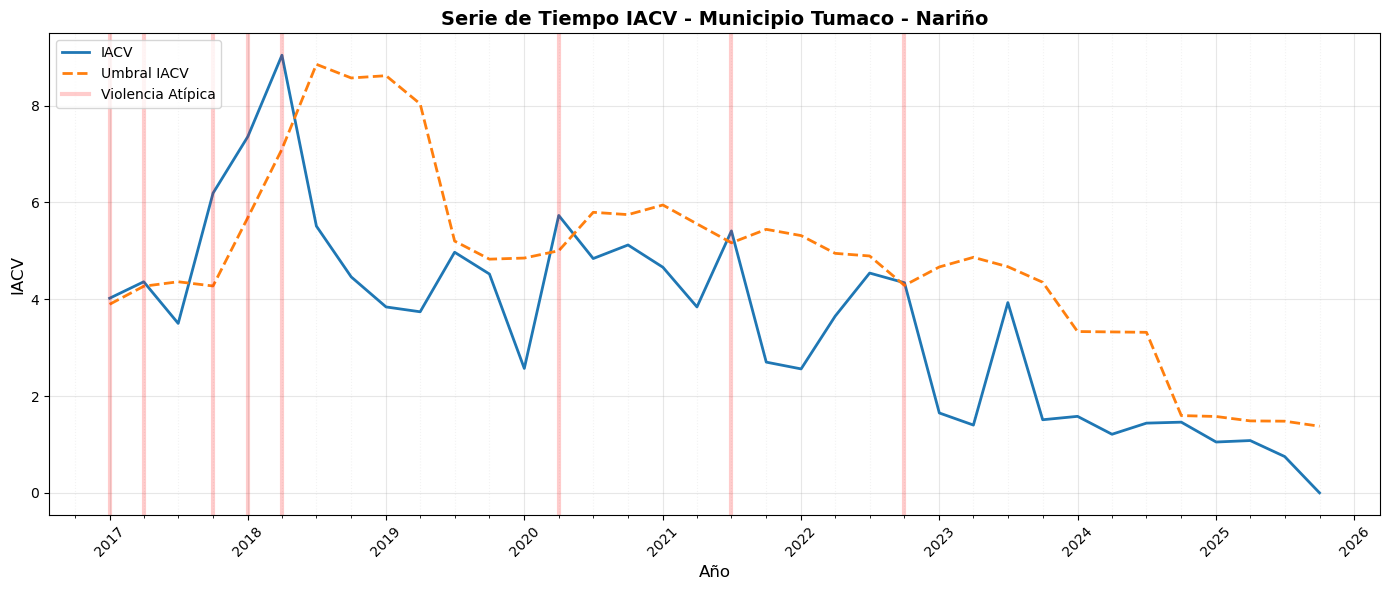

In [34]:
# Filtrar datos para el municipio
df_plot = df_final.query("mun_code == '52835'").copy()
df_plot['date'] = pd.to_datetime(df_plot['quarter'].astype(str))

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 6))

# Plotear ambas series en el mismo eje
ax.plot(df_plot['date'], df_plot['iacv'], color='tab:blue', label='IACV', linewidth=2)
ax.plot(df_plot['date'], df_plot['iacv_t'], color='tab:orange', label='Umbral IACV', linewidth=2, linestyle='--')

# Configurar eje y
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('IACV', fontsize=12)
ax.tick_params(axis='y')

# Grilla trimestral
ax.grid(True, alpha=0.3, which='major', axis='both')
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  # Inicio de cada trimestre
ax.grid(True, alpha=0.15, which='minor', axis='x', linestyle=':')

# Marcar períodos de violencia atípica con barras verticales tenues
atypical = df_plot[df_plot['atypical_violence_iacv'] == 1]
for date in atypical['date']:
    ax.axvline(x=date, color='red', alpha=0.2, linewidth=3, label='Violencia Atípica' if date == atypical['date'].iloc[0] else '')

# Formato de fechas en eje x - solo años en las etiquetas
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Título y leyenda
plt.title('Serie de Tiempo IACV - Municipio Tumaco - Nariño', fontsize=14, fontweight='bold')

# Obtener handles y labels únicos
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
ax.legend(unique_handles, unique_labels, loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/8t/dl_cld1d1vs92q1fgb7vjsxc0000gn/T/ipykernel_19917/339630824.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot['date'] = pd.to_datetime(df_plot['quarter'].astype(str))


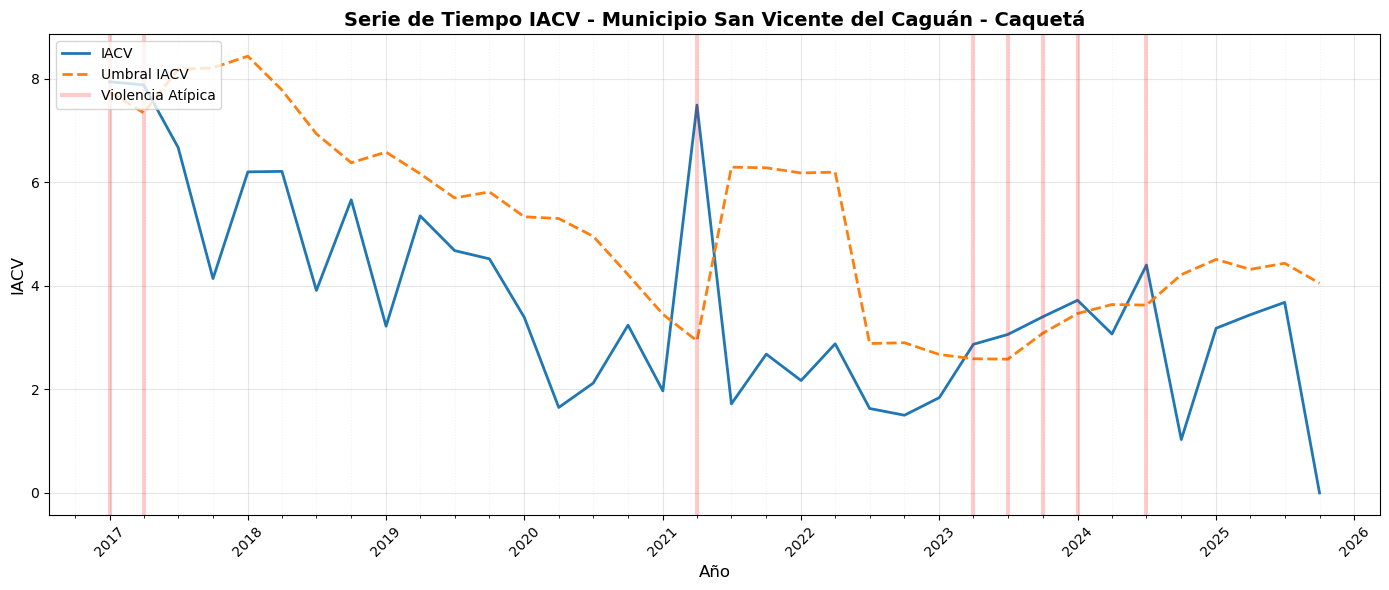

In [35]:
# Filtrar datos para el municipio
df_plot = df_final.query("mun_code == '18753'").copy()
df_plot['date'] = pd.to_datetime(df_plot['quarter'].astype(str))

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 6))

# Plotear ambas series en el mismo eje
ax.plot(df_plot['date'], df_plot['iacv'], color='tab:blue', label='IACV', linewidth=2)
ax.plot(df_plot['date'], df_plot['iacv_t'], color='tab:orange', label='Umbral IACV', linewidth=2, linestyle='--')

# Configurar eje y
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('IACV', fontsize=12)
ax.tick_params(axis='y')

# Grilla trimestral
ax.grid(True, alpha=0.3, which='major', axis='both')
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  # Inicio de cada trimestre
ax.grid(True, alpha=0.15, which='minor', axis='x', linestyle=':')

# Marcar períodos de violencia atípica con barras verticales tenues
atypical = df_plot[df_plot['atypical_violence_iacv'] == 1]
for date in atypical['date']:
    ax.axvline(x=date, color='red', alpha=0.2, linewidth=3, label='Violencia Atípica' if date == atypical['date'].iloc[0] else '')

# Formato de fechas en eje x - solo años en las etiquetas
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Título y leyenda
plt.title('Serie de Tiempo IACV - Municipio San Vicente del Caguán - Caquetá', fontsize=14, fontweight='bold')

# Obtener handles y labels únicos
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
ax.legend(unique_handles, unique_labels, loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/8t/dl_cld1d1vs92q1fgb7vjsxc0000gn/T/ipykernel_19917/3042533757.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot['date'] = pd.to_datetime(df_plot['quarter'].astype(str))


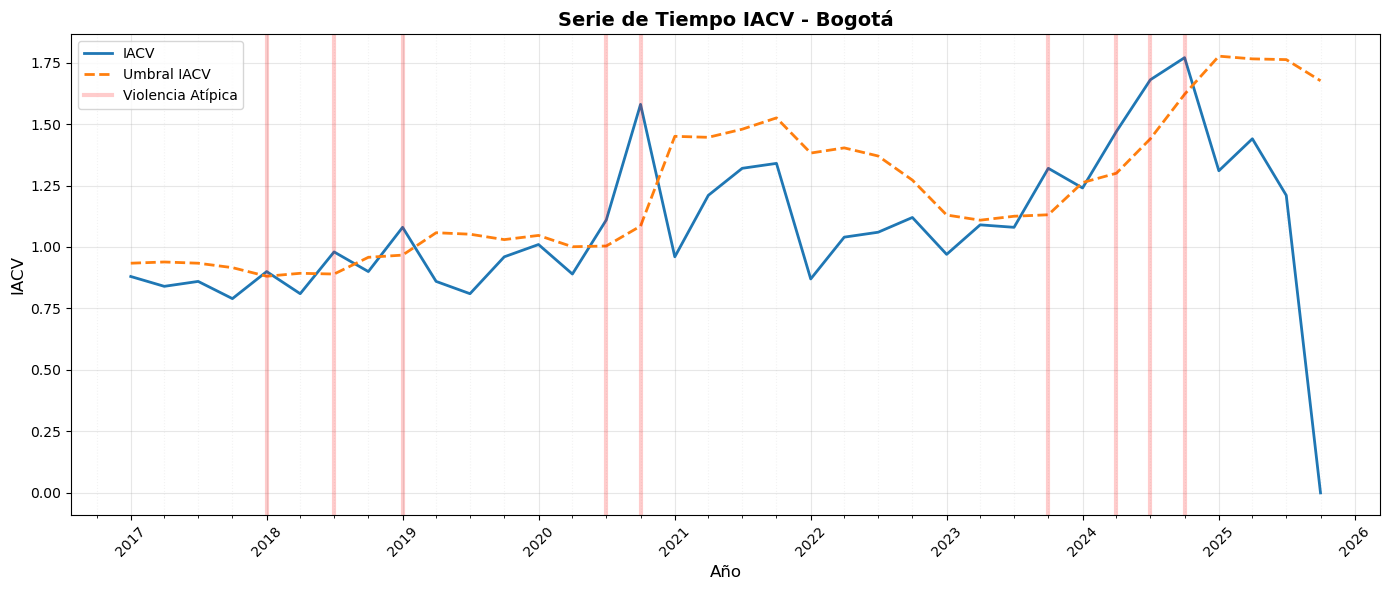

In [36]:
# Filtrar datos para el municipio
df_plot = df_final.query("mun_code == '11001'").copy()
df_plot['date'] = pd.to_datetime(df_plot['quarter'].astype(str))

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 6))

# Plotear ambas series en el mismo eje
ax.plot(df_plot['date'], df_plot['iacv'], color='tab:blue', label='IACV', linewidth=2)
ax.plot(df_plot['date'], df_plot['iacv_t'], color='tab:orange', label='Umbral IACV', linewidth=2, linestyle='--')

# Configurar eje y
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('IACV', fontsize=12)
ax.tick_params(axis='y')

# Grilla trimestral
ax.grid(True, alpha=0.3, which='major', axis='both')
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  # Inicio de cada trimestre
ax.grid(True, alpha=0.15, which='minor', axis='x', linestyle=':')

# Marcar períodos de violencia atípica con barras verticales tenues
atypical = df_plot[df_plot['atypical_violence_iacv'] == 1]
for date in atypical['date']:
    ax.axvline(x=date, color='red', alpha=0.2, linewidth=3, label='Violencia Atípica' if date == atypical['date'].iloc[0] else '')

# Formato de fechas en eje x - solo años en las etiquetas
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Título y leyenda
plt.title('Serie de Tiempo IACV - Bogotá', fontsize=14, fontweight='bold')

# Obtener handles y labels únicos
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
ax.legend(unique_handles, unique_labels, loc='upper left')

plt.tight_layout()
plt.show()

In [37]:
df_final.to_parquet(processed / 'iacv_index.parquet', index=False)

In [38]:
df_antiguo = pd.read_parquet('/Users/juandiegoheredianino/Library/CloudStorage/OneDrive-Universidaddelosandes/early-warning-atypical-violence-forecast/data/processed/db_no_jep.parquet')[['mun_code', 'quarter','coca',
       'amapola', 'y_corr', 'y_corr_tribut_IyC', 'DF_ing_func', 'DF_deuda',
       'DF_desemp_fisc', 's11_total', 'docen_total', 'alumn_total', 'nbi_2005',
       'nbi_2018', 'IPM_2005', 'IPM_2018', 'ipm_ledu_p_2005',
       'ipm_ledu_p_2018', 'ipm_analf_p_2005', 'ipm_analf_p_2018',
       'ipm_asisescu_p_2005', 'ipm_asisescu_p_2018', 'ipm_rezagoescu_p_2005',
       'ipm_rezagoescu_p_2018', 'ipm_serv_pinf_p_2005', 'ipm_serv_pinf_p_2018',
       'ipm_ti_p_2005', 'ipm_ti_p_2018', 'ipm_templeof_p_2005',
       'ipm_templeof_p_2018', 'ipm_assalud_p_2005', 'ipm_assalud_p_2018',
       'ipm_accsalud_p_2005', 'ipm_accsalud_p_2018', 'ipm_accagua_p_2005',
       'ipm_accagua_p_2018', 'ipm_excretas_p_2005', 'ipm_excretas_p_2018',
       'ipm_pisos_p_2005', 'ipm_pisos_p_2018', 'ipm_paredes_p_2005',
       'ipm_paredes_p_2018', 'ipm_hacinam_p_2005', 'ipm_hacinam_p_2018',
       'indrural', 'areaoficialkm2', 'altura', 'discapital', 'dismdo',
       'disbogota', 'distancia_mercado']]

df = df_final.merge(df_antiguo, on=['mun_code', 'quarter'], how='left').dropna().reset_index(drop=True)
df['dept_code'] = df['mun_code'].str[:2].astype('category')
df.to_parquet(processed / 'db.parquet', index=False)